In [1]:
import tensorflow
from tensorflow import keras
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from keras import  Sequential
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import cv2
from keras.models import load_model


# Loading Dataset:

It is dataset of Handwritten numbers so overall purpose of convolutional neural network will be to identify handwritten numbers.

In [2]:
(x_train, y_train), (x_test, y_test)= mnist.load_data()

In [3]:
x_train[0].shape

(28, 28)

### How data looks like:

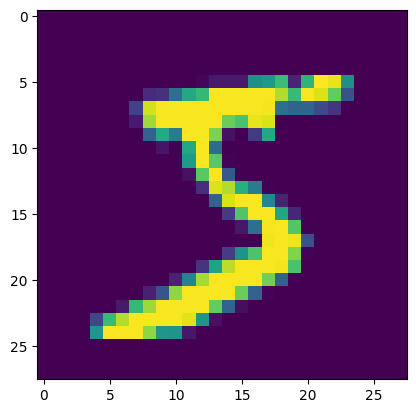

In [4]:
plt.imshow(x_train[0])

# CNN Model

In [7]:
model= Sequential()


#adding convolutional layer
model.add(Conv2D(   
    #number of filters----> total we will have 32 filter of each size 3x3
    5,
    #size of the filter
    kernel_size= (3,3),
    #now for no padding we will set padding to 'valid'
    padding= 'valid',
    activation= 'relu',
    input_shape= (28,28,1)))


#after convolutional layer adding MaxPooling layer
model.add(MaxPooling2D(
    #window size/filter size
    pool_size= (2,2),
    #stride
    strides=2,
    #we do not consider or do padding in max pooling layer so
    padding= 'valid'
))
model.add(Flatten())


#Fully Connected Layers
model.add(Dense(60,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 5)         50        
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 5)         0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 845)               0         
                                                                 
 dense_2 (Dense)             (None, 60)                50760     
                                                                 
 dense_3 (Dense)             (None, 10)                610       
                                                                 
Total params: 51420 (200.86 KB)
Trainable params: 51420 (200.86 KB)
Non-trainable params: 0 (0.00 Byte)
________________

In [9]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [10]:
model.fit(x_train,
          y_train,
          epochs= 6)

Epoch 1/6


1875/1875 [==============================] - 8s 4ms/step - loss: 0.9045 - accuracy: 0.8558
Epoch 2/6
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1729 - accuracy: 0.9532
Epoch 3/6
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1092 - accuracy: 0.9681
Epoch 4/6
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0828 - accuracy: 0.9754
Epoch 5/6
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0682 - accuracy: 0.9786
Epoch 6/6
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0572 - accuracy: 0.9827


In [11]:
loss, accuracy = model.evaluate(x_test, y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1051 - accuracy: 0.9711
0.9710999727249146


97% accuracy on test set.

# Saving the Model:

In [12]:
model.save('number_classification_model.h5')

e:\JMM\JMMProjects\SMLT\myenv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Prediction on real image number Image:

In [13]:
number_classification_model= load_model('number_classification_model.h5')

In [14]:
def predict_number(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    print('Size of original image: ', image.shape)
    #resizinig accordin to size model is accepting
    image_resized = cv2.resize(image, (28, 28))
    print('Shape after resizing: ', image_resized.shape)
    image_normalized = image_resized / 255.0
    plt.title('Original Number Image')
    plt.imshow(image)
    image_reshaped = np.expand_dims(image_resized, axis=0)
    class_probabilities = number_classification_model.predict(image_reshaped)
    predicted_class = np.argmax(class_probabilities)
    print('Prediction: ')
    return predicted_class

Size of original image:  (316, 322)
Shape after resizing:  (28, 28)
1/1 [==============================] - 0s 26ms/step
Prediction: 
5


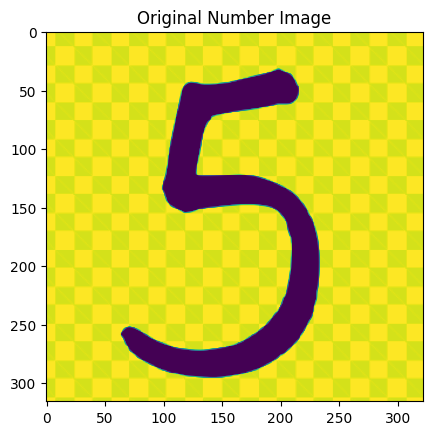

In [16]:
print(predict_number('image_5.png'))